In [3]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

df=pd.read_csv('final_merged_data1.csv')

In [4]:
df.head(2)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Country
0,6317637,162,121.027535,14.565443,1100,3,4.8,Excellent,314,Phillipines
1,6304287,162,121.014101,14.553708,1200,3,4.5,Excellent,591,Phillipines


In [5]:
df_country=pd.read_excel("C:\\Users\\ACER\\Downloads\\Country-Code.xlsx")

In [6]:
df_country.head(2)

,Country Code,Country
0,1,India
1,14,Australia


In [7]:
final_df = df.merge(df_country, on='Country Code', how='left')
final_df.head(2)


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Country_x,Country_y
0,6317637,162,121.027535,14.565443,1100,3,4.8,Excellent,314,Phillipines,Phillipines
1,6304287,162,121.014101,14.553708,1200,3,4.5,Excellent,591,Phillipines,Phillipines


In [8]:
import pandas as pd 
df=pd.read_csv('final_merged_data1.csv')
df.head(2)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Country
0,6317637,162,121.027535,14.565443,1100,3,4.8,Excellent,314,Phillipines
1,6304287,162,121.014101,14.553708,1200,3,4.5,Excellent,591,Phillipines


In [9]:
#splitting data into independent and dependent features
X=final_df.drop(labels=['Aggregate rating','Restaurant ID'],axis=1)

In [10]:
y = final_df[['Aggregate rating']]


In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(9551, 42)

In [14]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7640, 42), (1911, 42))

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1773
- Mean Absolute Error: 0.1281
- R2 Score: 0.9864
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1764
- Mean Absolute Error: 0.1290
- R2 Score: 0.9863


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.5181
- Mean Absolute Error: 1.2239
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.5090
- Mean Absolute Error: 1.2194
- R2 Score: -0.0004


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1773
- Mean Absolute Error: 0.1279
- R2 Score: 0.9864
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1766
- Mean Absolute Error: 0.1289
- R2 Score: 0.9863


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1673
- Mean Absolute Error: 0.1054
- R2 Score: 0.9878
----------------------

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0659
- Mean Absolute Error: 0.0446
- R2 Score: 0.9981
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1784
- Mean Absolute Error: 0.1210
- R2 Score: 0.9860


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1095
- Mean Absolute Error: 0.0748
- R2 Score: 0.9948
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1801
- Mean Absolute Error: 0.1248
- R2 Score: 0.9858


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1407
- Mean Absolute Error: 0.0977
- R2 Score: 0.9914
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1711
- Mean Absolute Error: 0.1195
- R2 Score: 0.9871




c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1895
- Mean Absolute Error: 0.1356
- R2 Score: 0.9844
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1894
- Mean Absolute Error: 0.1363
- R2 Score: 0.9842




In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.987134
0,Linear Regression,0.986334
2,Ridge,0.986293
5,Random Forest Regressor,0.986019
6,XGBRegressor,0.985756
8,AdaBoost Regressor,0.984236
3,K-Neighbors Regressor,0.976675
4,Decision Tree,0.973390
1,Lasso,-0.000447


In [18]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.63


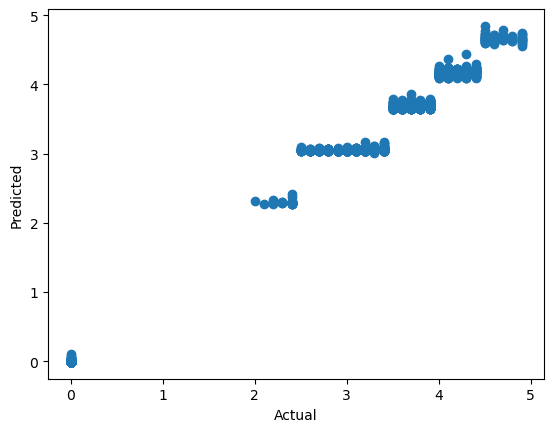

In [19]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

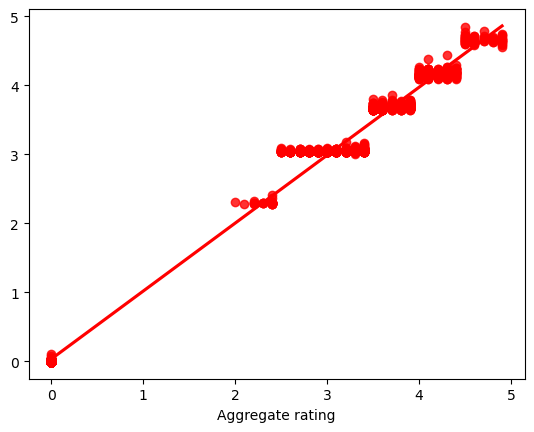

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [21]:
import pandas as pd

# Ensure y_test is a one-dimensional array
y_test_values = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()

# Ensure y_pred is a one-dimensional array
y_pred_values = y_pred.flatten() if isinstance(y_pred, pd.DataFrame) else y_pred.flatten()

# Create the DataFrame pred_df
pred_df = pd.DataFrame({'Actual Value': y_test_values, 'Predicted Value': y_pred_values, 'Difference': y_test_values - y_pred_values})

# Display pred_df
print(pred_df)

print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)



      Actual Value  Predicted Value  Difference
0              2.1         2.276860   -0.176860
1              4.1         4.111367   -0.011367
2              3.2         3.051690    0.148310
3              4.4         4.098413    0.301587
4              3.5         3.647402   -0.147402
...            ...              ...         ...
1906           2.6         3.052013   -0.452013
1907           0.0        -0.007369    0.007369
1908           3.1         3.050972    0.049028
1909           4.2         4.186879    0.013121
1910           4.3         4.181814    0.118186

[1911 rows x 3 columns]
Shape of y_test: (1911, 1)
Shape of y_pred: (1911, 1)
